Given colored boxes r(red), g(green), and b(blue)
Box r=> contains contains 3 apples,4 Oranges and 3 limes
Box g => contains 3 apples, 3 oranges and 4 limes
Box b =>contains 1 apple, 1 oranges and 0 limes 


Total apple (Ta)=3+3+1=10 apples
total oranges(To)=4+3+1=8 Oranges
toal lime(Tl)=3+4+0=7limes
Proability of getting apples in red box = 3/10 =0.3
Proability of getting oranges in red box = 4/8 =0.5
Proability of getting lime  in red box =3/7 =0.43
Proability of getting apples in green box = 3/10 =0.3
Proability of getting apples in blue box = 1/10 =0.1
___________This is solved via Mathemeaticals tatics

In this exercise you will have to write functions which estimate the probability density
function (pdf) of a given dataset of 100 data points (represented by a 100 dimensional
vector). For representing the (continuous) pdf in discrete form in Python, create a linearly
spaced vector using the command:

In [21]:
import numpy as np
import pandas as pd

In [22]:
#5-a
def kde(samples, h):
    # compute density estimation from samples with KDE
    # Input
    #  samples    : DxN matrix of data points
    #  h          : (half) window size/radius of kernel
    # Output
    #  estDensity : estimated density in the range of [-5,5]

    #####Start Subtask 5a#####
    # Compute the number of samples created
    N = len(samples)

    # Create a linearly spaced vector
    pos = np.arange(-5, 5.0, 0.1)

    # Estimate the density from the samples using a kernel density estimator
    norm = np.sqrt(2 * np.pi) * h * N
    res = np.sum(np.exp(-(pos[np.newaxis, :] - samples[:, np.newaxis]) ** 2 / (2 * h ** 2)), axis=0) / norm

    # Form the output variable
    estDensity = np.stack((pos, res), axis=1)

    #####End Subtask#####
    return estDensity


In [20]:
#5-b
def knn(samples, k):
    # compute density estimation from samples with KNN
    # Input
    #  samples    : DxN matrix of data points
    #  k          : number of neighbors
    # Output
    #  estDensity : estimated density in the range of [-5, 5]

    #####Start Subtask 5b#####
    # Compute the number of the samples created
    N = len(samples)

    # Create a linearly spaced vector
    pos = np.arange(-5, 5.0, 0.1)

    # Sort the distances so that we can choose the k-th point
    dists = np.sort(np.abs(pos[np.newaxis, :] - samples[:, np.newaxis]), axis=0)

    # Estimate the probability density using the k-NN density estimation
    res = (k / (2 * N)) / dists[k - 1, :]

    # Form the output variable
    estDensity = np.stack((pos, res), axis=1)

    #####End Subtask#####
    return estDensity


In [29]:
def parameters():
    k = 30  # knn neighbors
    h = 0.3  # kde windowsize / radius
    return h, k


In [30]:
def gauss1D(m, v, N, w):
    pos = np.arange(-w, w - w / N, 2 * w / N)
    insE = -0.5 * ((pos - m) / v) ** 2
    norm = 1 / (v * np.sqrt(2 * np.pi))
    res = norm * np.exp(insE)
    realDensity = np.stack((pos, res), axis=1)
    return realDensity


Question: Kernel/K-Nearest Neighborhood Density Estimators


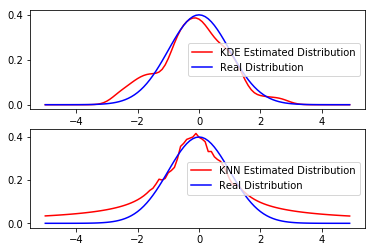

In [31]:

import matplotlib.pyplot as plt

h, k = parameters()

print('Question: Kernel/K-Nearest Neighborhood Density Estimators')

# Produce the random samples
samples = np.random.normal(0, 1, 100)

# Compute the original normal distribution
realDensity = gauss1D(0, 1, 100, 5)

# Estimate the probability density using the KDE
estDensity = kde(samples, h)

# plot results
plt.subplot(2, 1, 1)
plt.plot(estDensity[:, 0], estDensity[:, 1], 'r', linewidth=1.5, label='KDE Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()

# Estimate the probability density using KNN
estDensity = knn(samples, k)

# Plot the distributions
plt.subplot(2, 1, 2)
plt.plot(estDensity[:, 0], estDensity[:, 1], 'r', linewidth=1.5, label='KNN Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()
plt.show()

TASK_6
Implementataion of EM and GMM
In simple terms , implementation of getLogLikelihood which computes the log-likelihood